#   [Hypothesis] There is a strong correlation between valence, energy, and danceability in popular music. The observed patterns in these average values over the years suggest that songs with higher valence tend to exhibit higher energy levels and danceability, while those with lower valence demonstrate lower energy and danceability. This correlation may indicate a consistent relationship between these musical features in the context of popular songs."

## [Why?] I found this hypothesis an interesting one to explore, since it can give my group valuable insight into specific variables, and whether their correlation with one another contributes to a songs inclusion on the Billboard Hot 100. 

## The process of visualizing this data, including preprocessing steps such as visuals and correlation analysis, will significantly streamline the creation of machine learning models. It lays the groundwork for a more informed understanding of the relationships between musical features and a song's popularity on the charts.
***

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
df = pd.read_csv("spotify_api_data.csv")

### The following cell creates a barplot using seaborn that plots the average Valence, Energy, and Danceability for songs for each year on the Billboard 100 from 2006-2022

### From first glance it does seem that Energy and Danceability have a slight negative correlation. It's a little hard to determine the correlation with Valence though...let's try visualzing the correlations a different way!

### 2015 onward also seems to mark a shift in songs being more danceable than energetic on average. Future plots could investigate this.

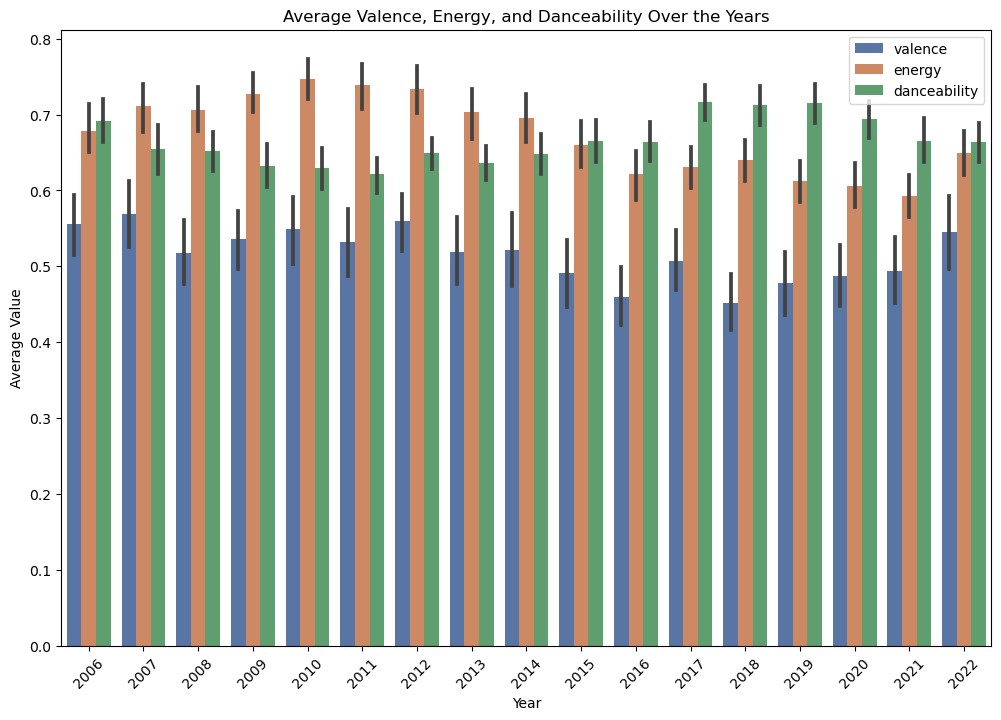

In [60]:
# Melt the DataFrame to have a variable column for 'valence', 'energy', and 'danceability'
melted_data = pd.melt(df, id_vars=['date'], value_vars=['valence', 'energy', 'danceability'])

# Set the color palette
sns.set_palette("deep")

fig, ax = plt.subplots(figsize=(12, 8))
ax = sns.barplot(x='date', y='value', hue='variable', data=melted_data)

# Set labels and title
plt.title('Average Valence, Energy, and Danceability Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Value')

# Set x-axis tick labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# Show legend
legend = plt.legend(loc="upper right")

# Show the plot
plt.show()

### The following cell creates a Correlation Coefficient Matrix for various features. A value of -1 represents a strong negative correlation between two variables, 0 represents no correlation, and 1 represents a strong positive correlation

### From a glance, we see that most Correlation Coefficients associated with Valence are close to 0 except for the ones associated with Energy and Danceability

### Valence and Energy have a correlation coefficient of 0.38, and Valence and Danceability have one of 0.30. While these values are considered to be in between the weak and moderate positive thresholds, they still should definitely be taken into consideration as potential dependencies that machine learning models can leverage for prediction, especially when considering the low coefficients associated with Valence.

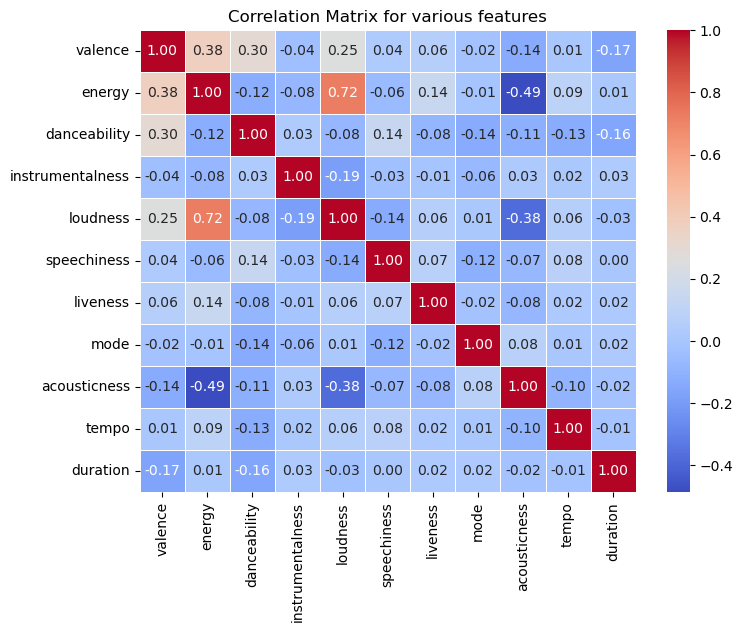

In [61]:
# Selecting various audio features for a broader comparison
selected_columns = ['valence', 'energy', 'danceability', 'instrumentalness', 'loudness', 'speechiness', 'liveness', 'mode', 'acousticness', 'tempo', 'duration']
selected_data = df[selected_columns]

# Calculate the correlation matrix
correlation_matrix = selected_data.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix for various features')
plt.show()

# [Conlusion] Despite having a Correlation Coefficient on the weaker positive side with one another, Energy and Danceability definitely stand out when being compared against Valence. This shows a correlation that indicates that increased levels of energy and danceability are at least somewhat directly associated with increased levels of Valence, which characterizes the majority of songs on the Billboard Hot 100.